In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('/content/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


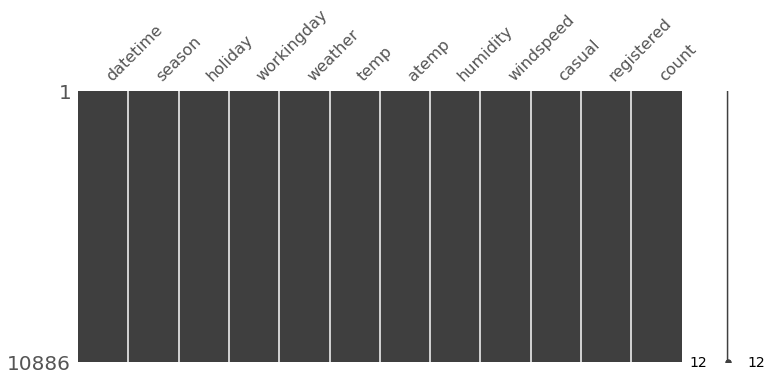

In [5]:
import missingno as msno

msno.matrix(train, figsize=(12, 5))

missingno.matrix()를 이용해 널값을 확인한 결과 널값이 없음을 확인

In [6]:
# datetime을 이용하여 연, 월, 일, 시, 분, 초로 분리해 열을 새로 생성함

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


colab 사용자용 Matplotlib 한글깨짐 방지

In [8]:
# # 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [9]:
# # 나눔고딕 경로확인하기
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'NanumGothic.ttf' in f]
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

In [10]:
# # 위에 나온 경로를 가져오기(똑같으면 바로 실행하시고 다르면 위에 내용을 복붙해주세요!)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [11]:
fm._rebuild()

In [12]:
from IPython.display import set_matplotlib_formats

## Windows의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')

## Mac의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

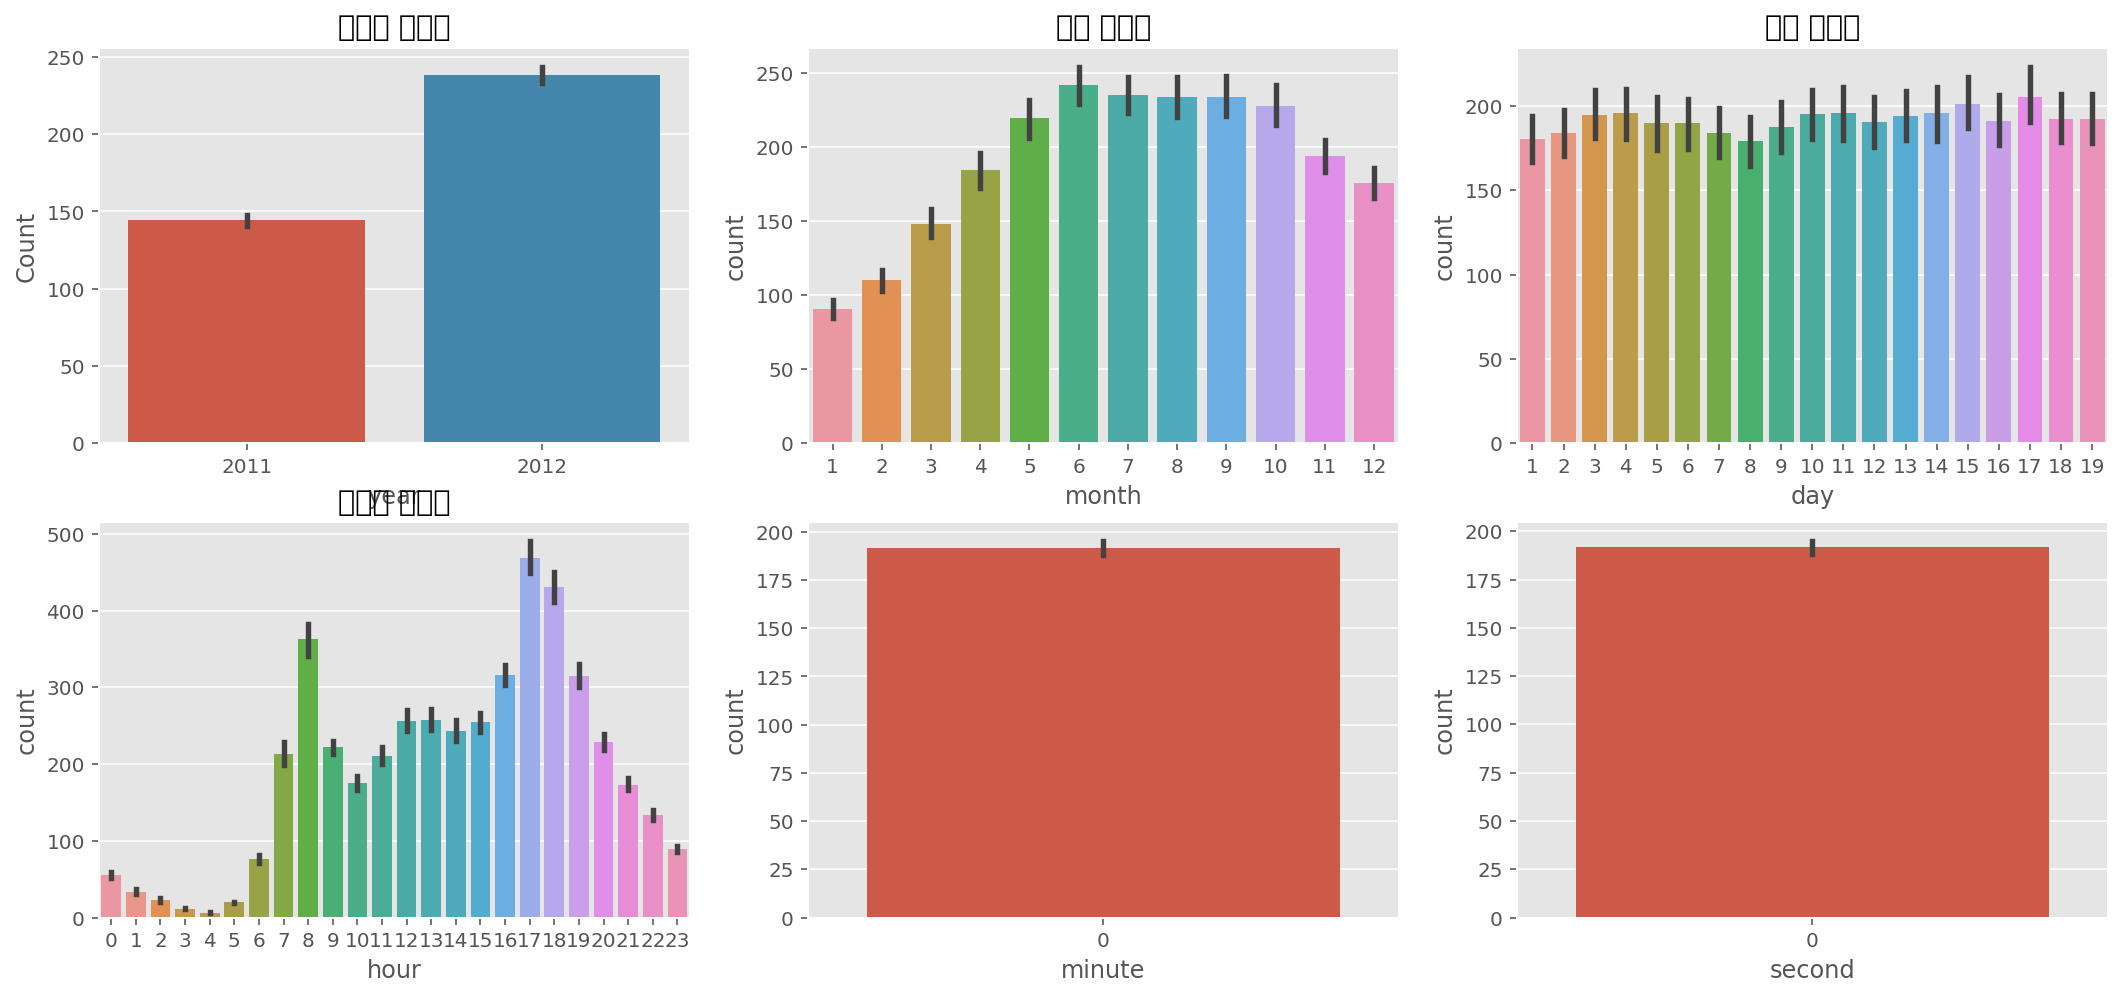

In [13]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(xlabel='month', title='월별 대여량')
ax3.set(xlabel='day', title='일별 대여량')
ax4.set(xlabel='hour', title='시간별 대여량')

plt.show()

- 연도별 대여랑은 2011년 보다 2012년이 더 많다.
- 월별 대여량은 6월이 가장 많고 7~10월도 대여량이 많다. 그리고 1월이 가장 적다(춥기 때문에)
- 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 feature로 사용할 수 없다.
- 시간별 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다, 하지만 주말과 나누어 확인해 볼 필요가 있다.
- 분과 초는 모두 0이므로 유의미한 값을 찾을 수 없다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_

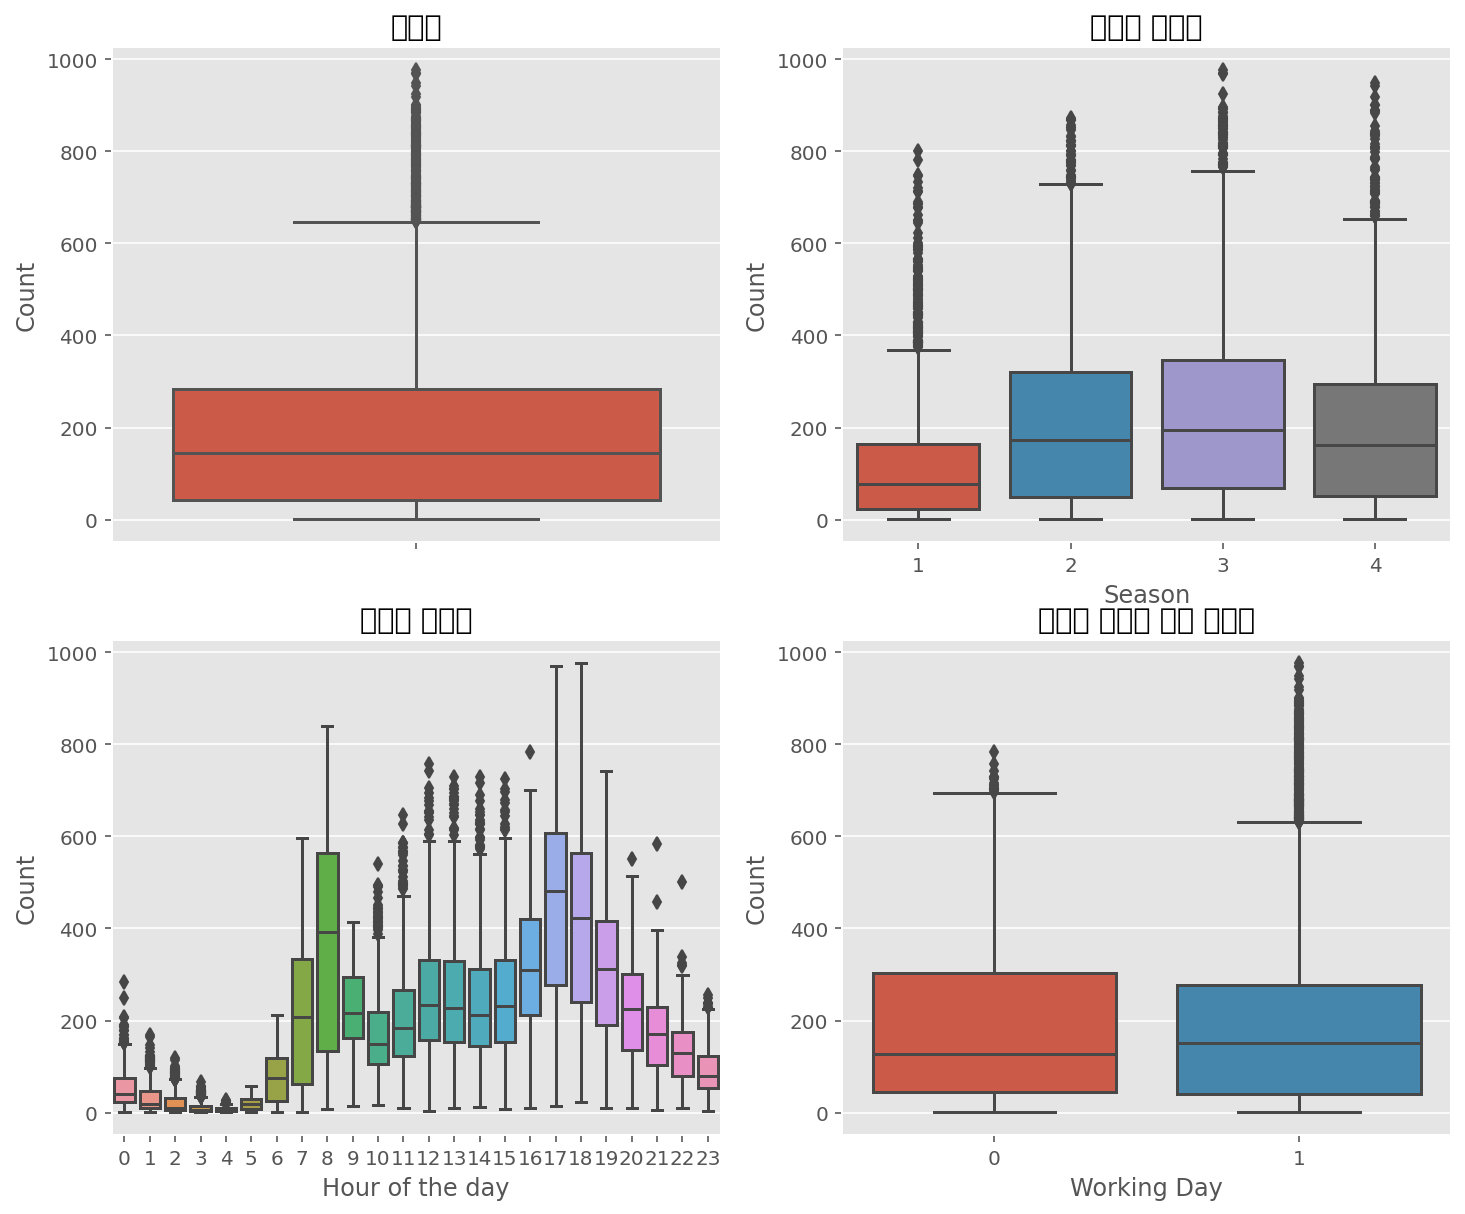

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='Count', title='대여량')
axes[0][1].set(xlabel='Season', ylabel='Count', title='계절별 대여량')
axes[1][0].set(xlabel='Hour of the day', ylabel='Count', title='시간별 대여량')
axes[1][1].set(xlabel='Working Day', ylabel='Count', title='근무일 여부에 따른 대여량')

plt.show()

In [15]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [16]:
train['dayofweek'].value_counts()
# 월 ~ 일요일

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

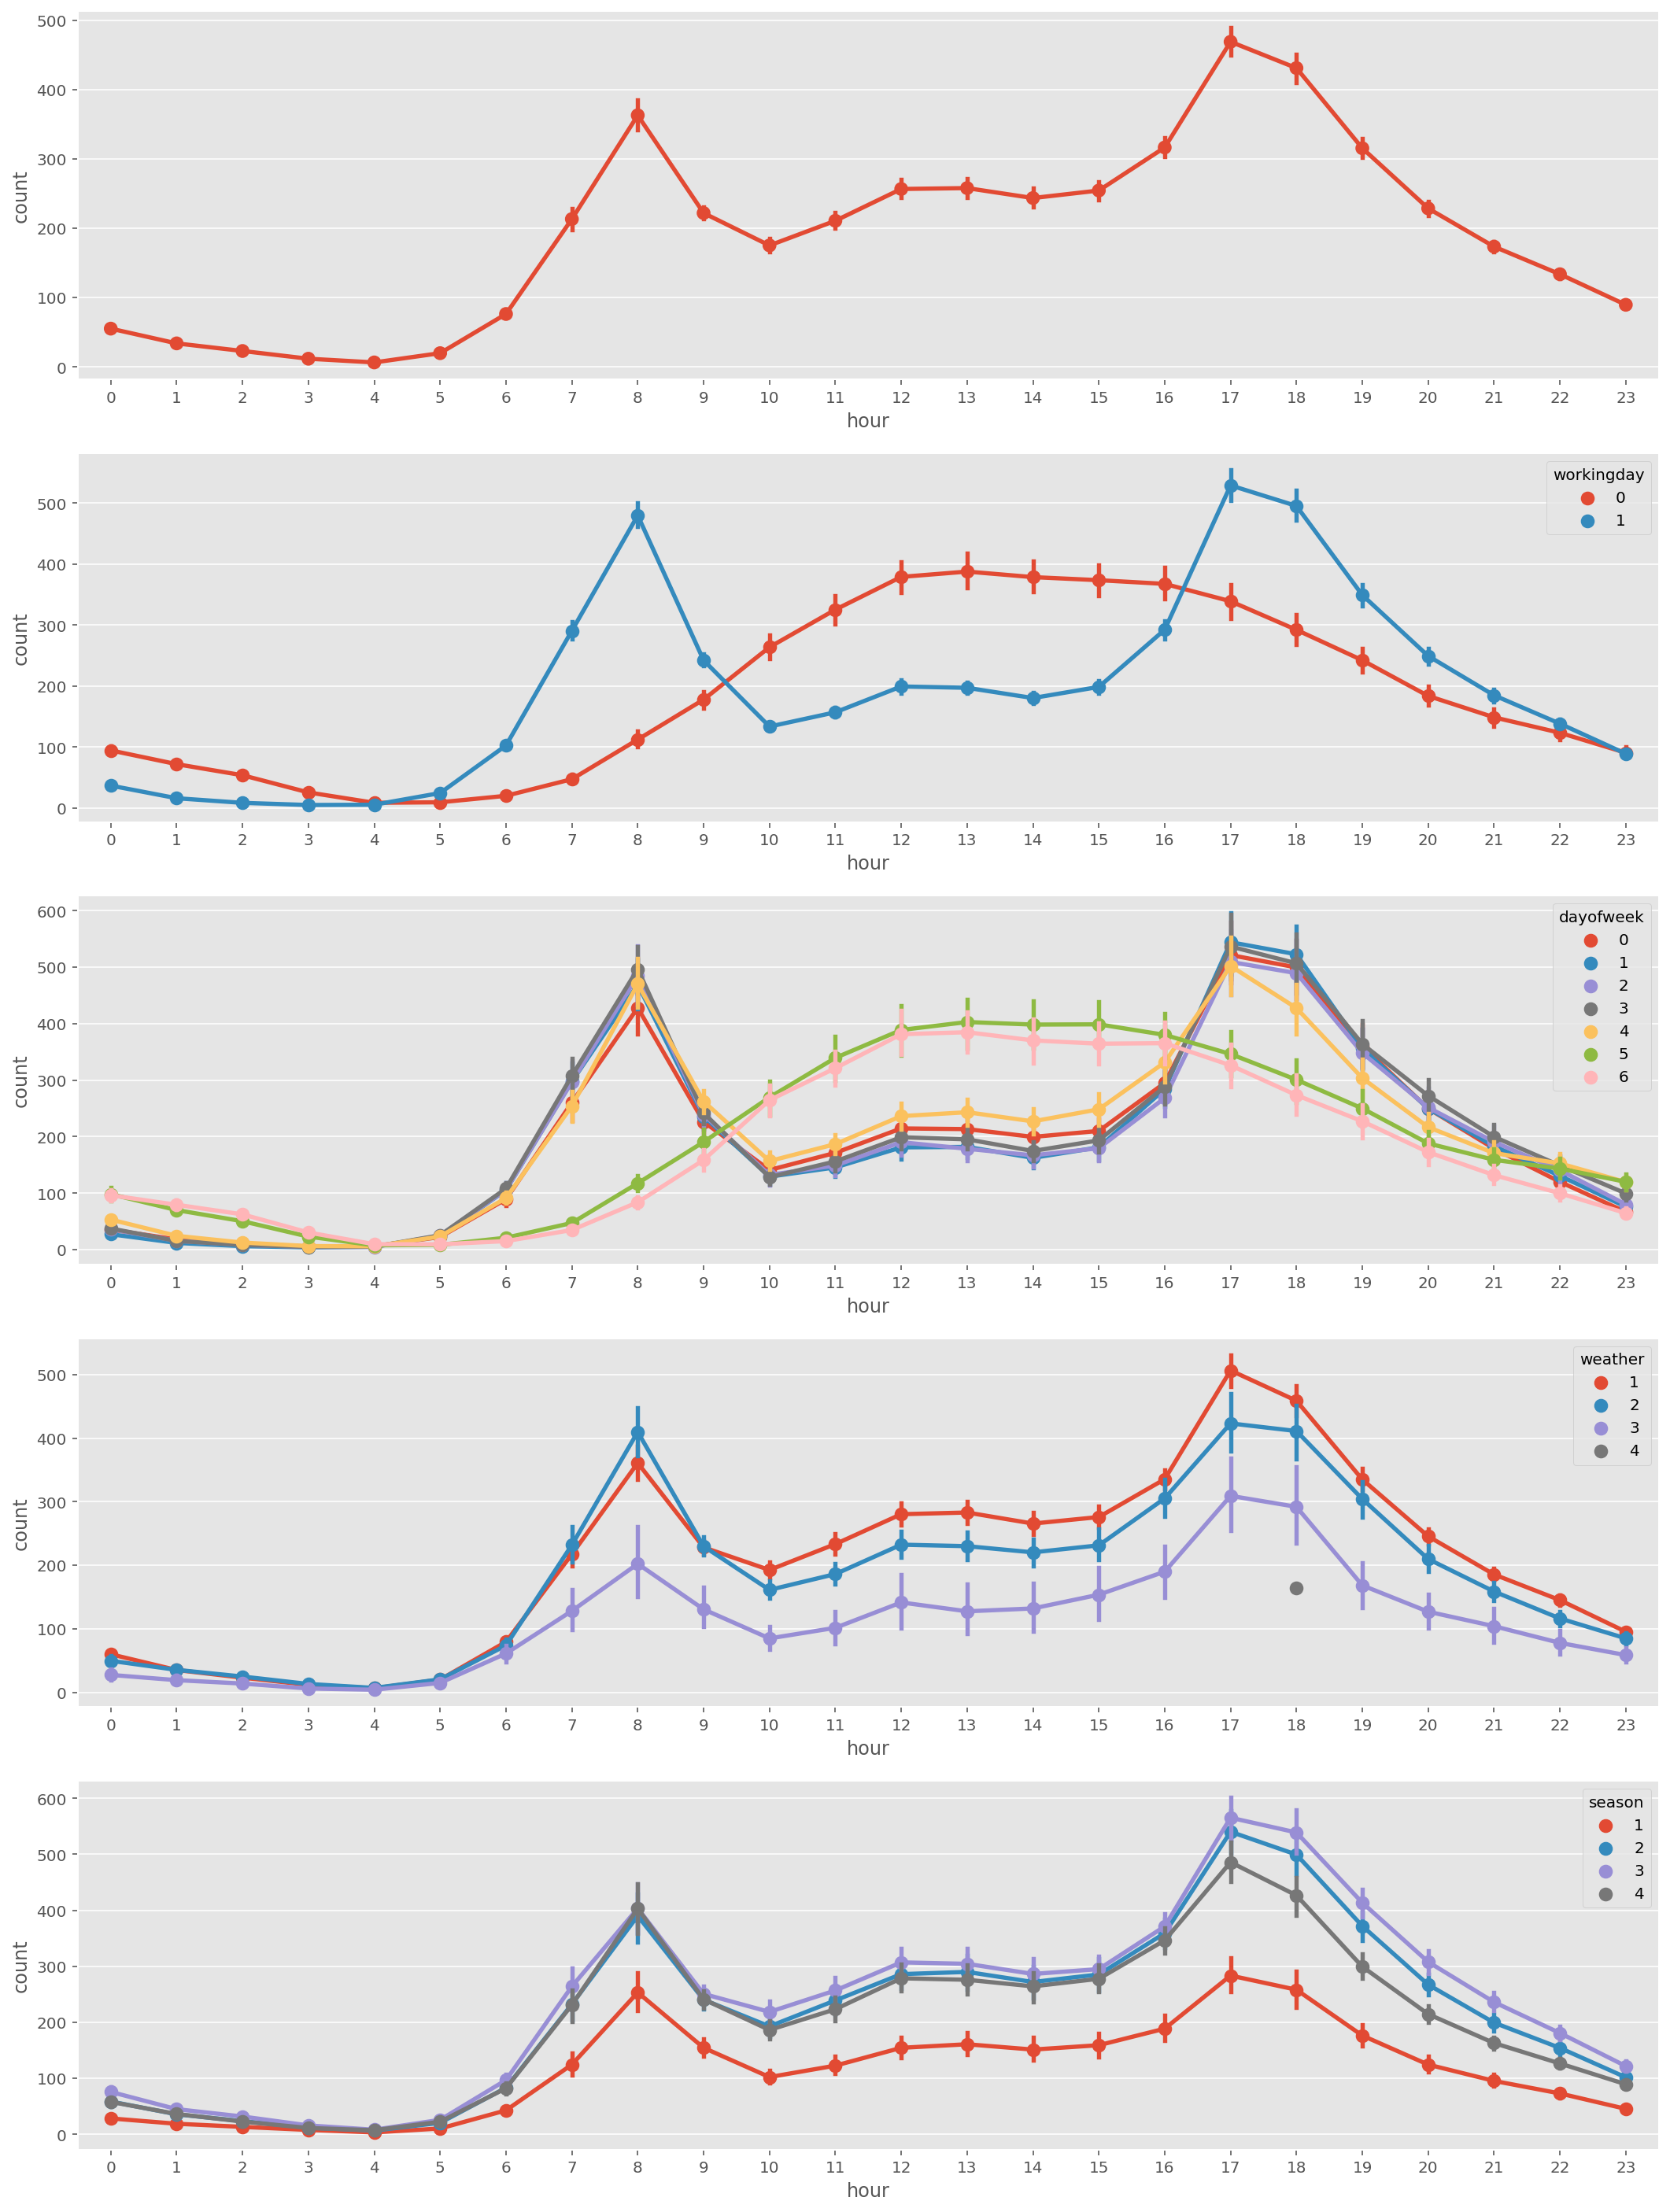

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)

sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)

sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [18]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


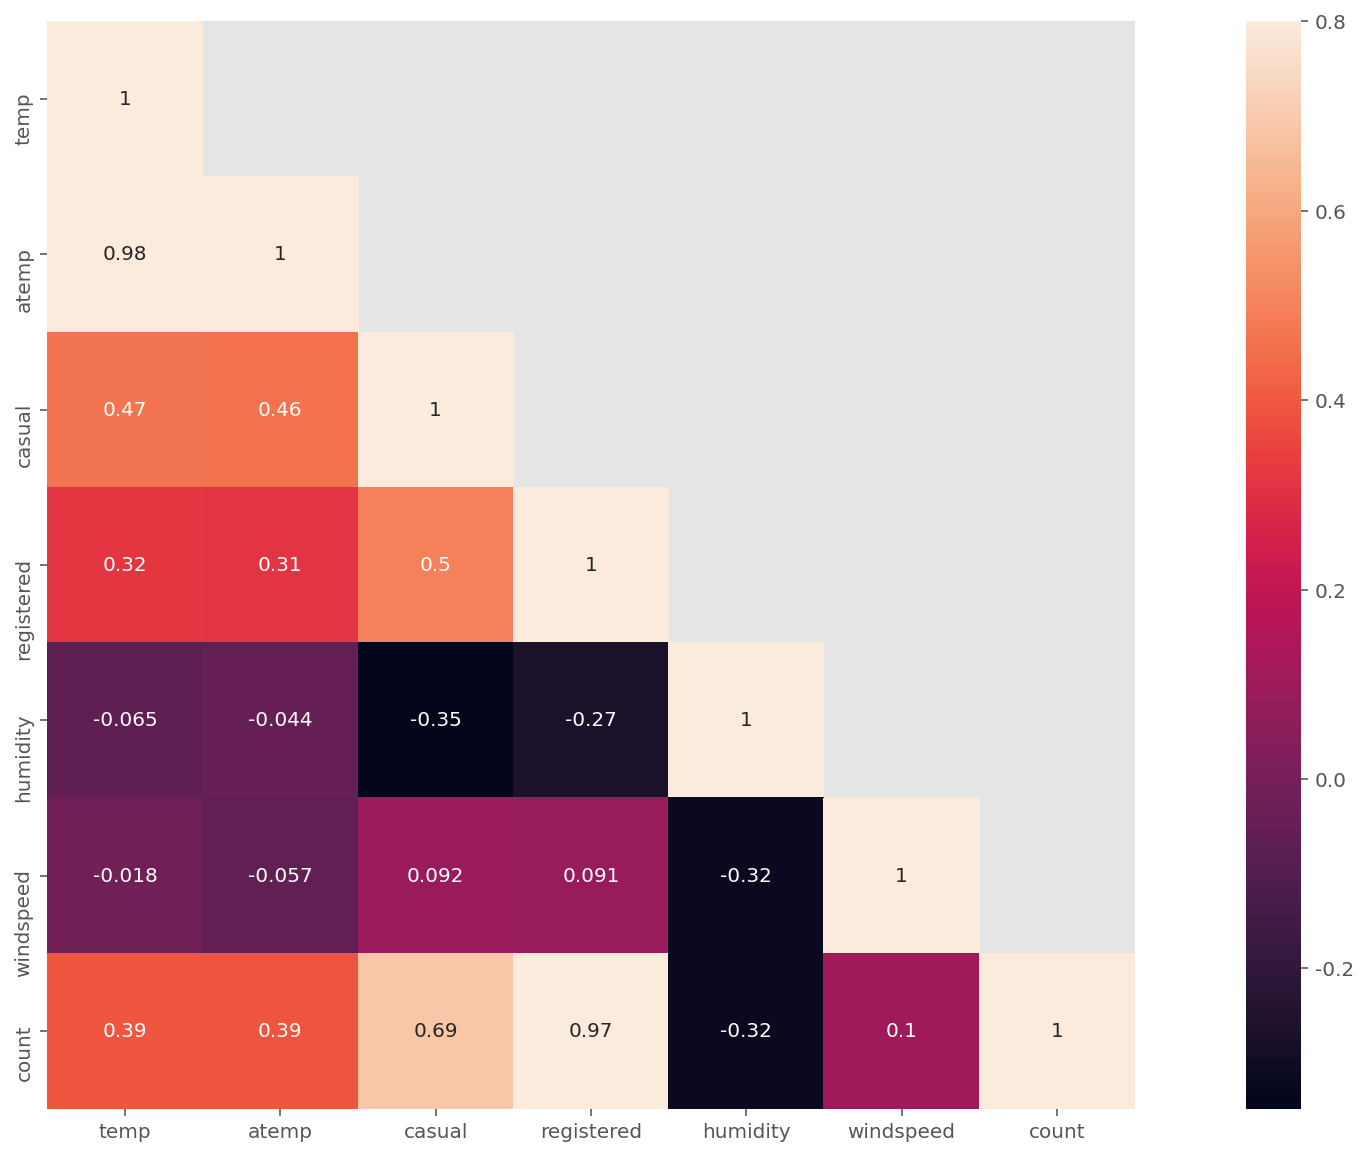

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)


- 온도, 습도, 풍속은 거의 연관관계가 없다.
- 대여량과 가장 연관이 높은 건 registered 로 등록된 대여자가 많지만 test 데이터에는 이 값이 없다.
- atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도를 feature로 사용하기에는 적합하지 않을 수 있다.



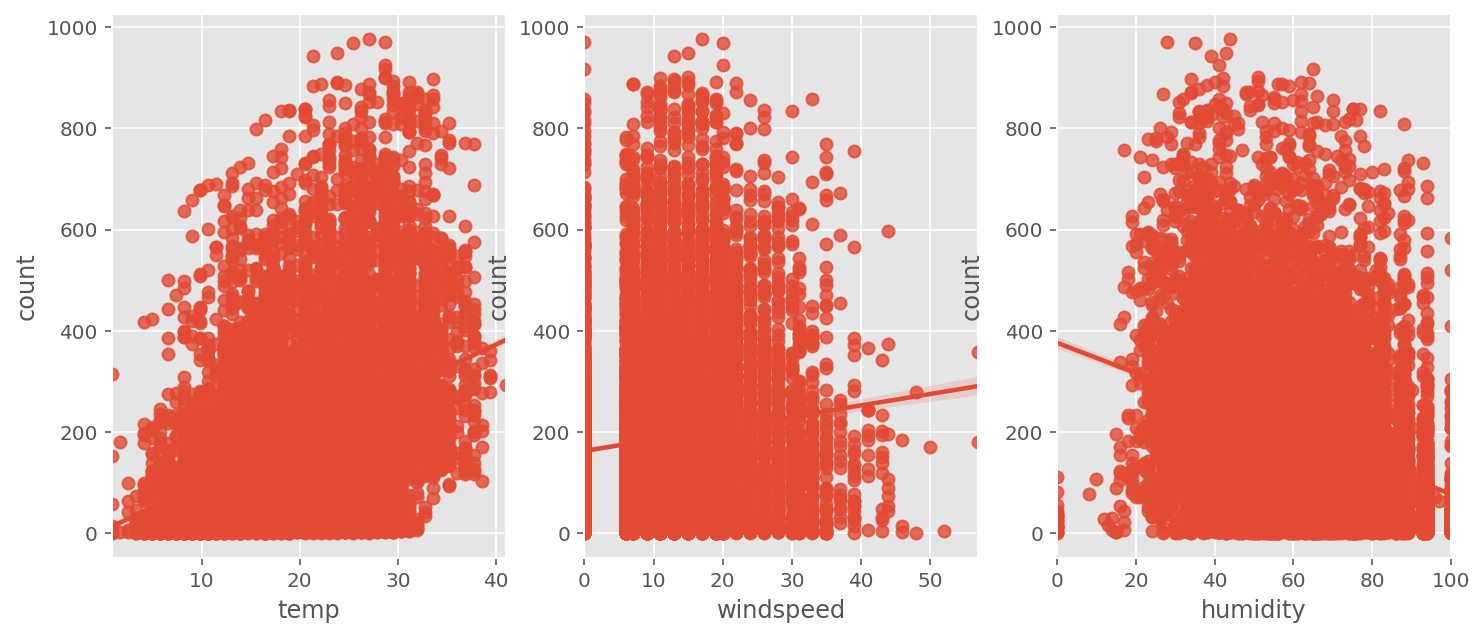

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

- 풍속의 경우 0에 숫자가 몰려있는 것을 확인할 수 있다.
- 아마도 관측되지 않은 수치에 대해 0을 기록한 것이 아닐까 싶다.

In [21]:
# concatenate_year_month라는 함수를 만들어서 year-month를 붙여주는 역할하기
def concatenate_year_month(datetime):
  return '{0}-{1}'.format(datetime.year, datetime.month)

# year_month라는 열 생성하기
train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


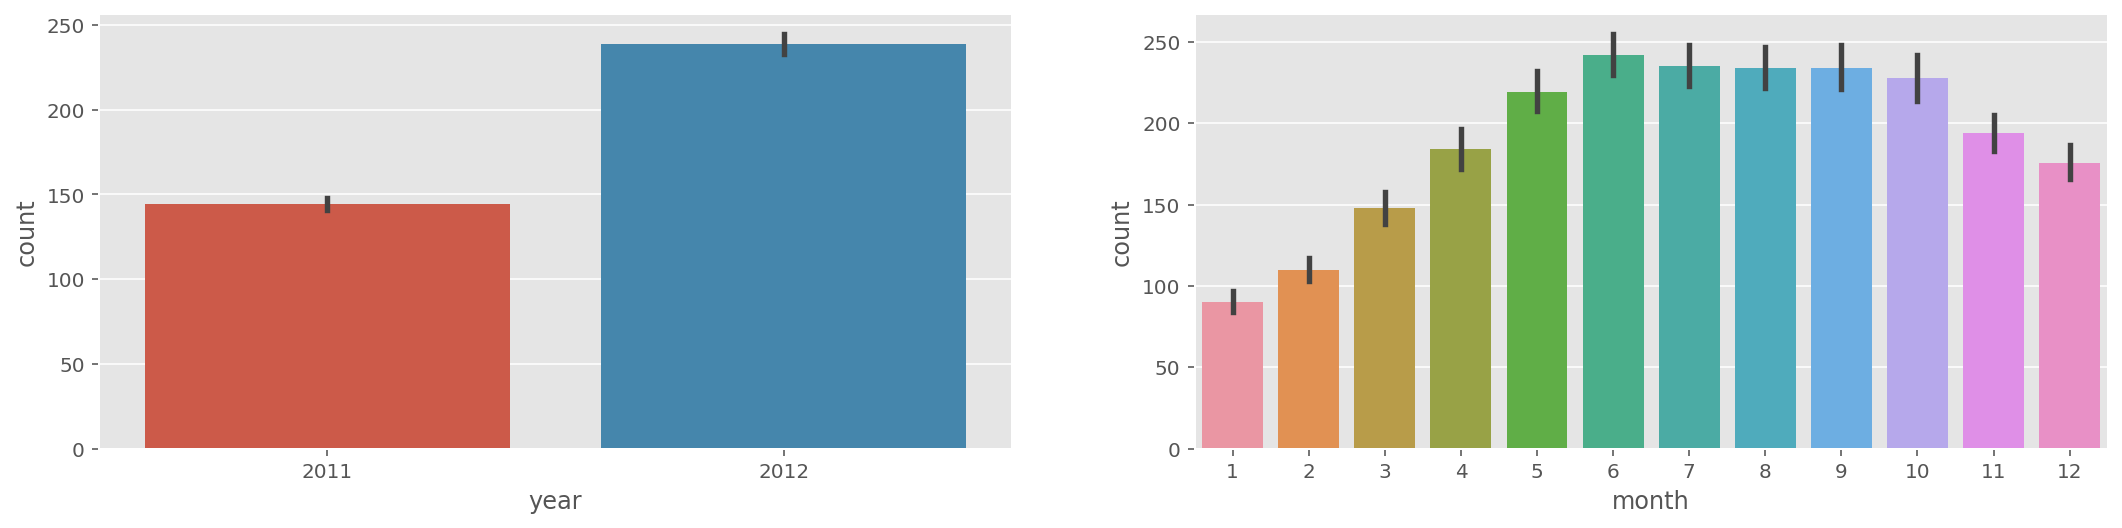

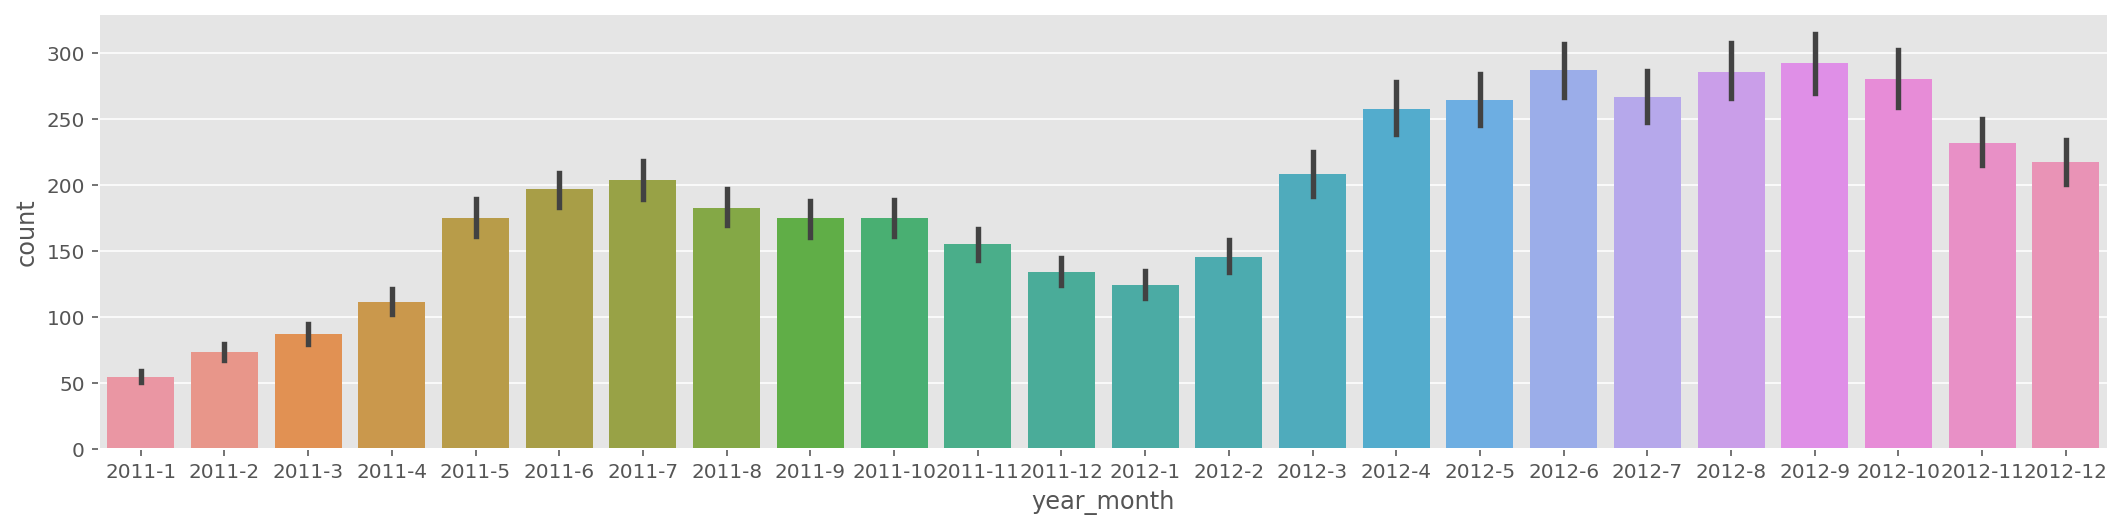

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

- 2011년보다 2012년의 자전거 대여량이 더 많다.
- 겨울보다는 여름에 대여량이 많다,
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [23]:
# train Without Outliers
train_Without_Outliers = train[np.abs(train['count'] - train['count'].mean()) <= (3 * train['count'].std())]

print(train.shape)
print(train_Without_Outliers.shape)

(10886, 20)
(10739, 20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


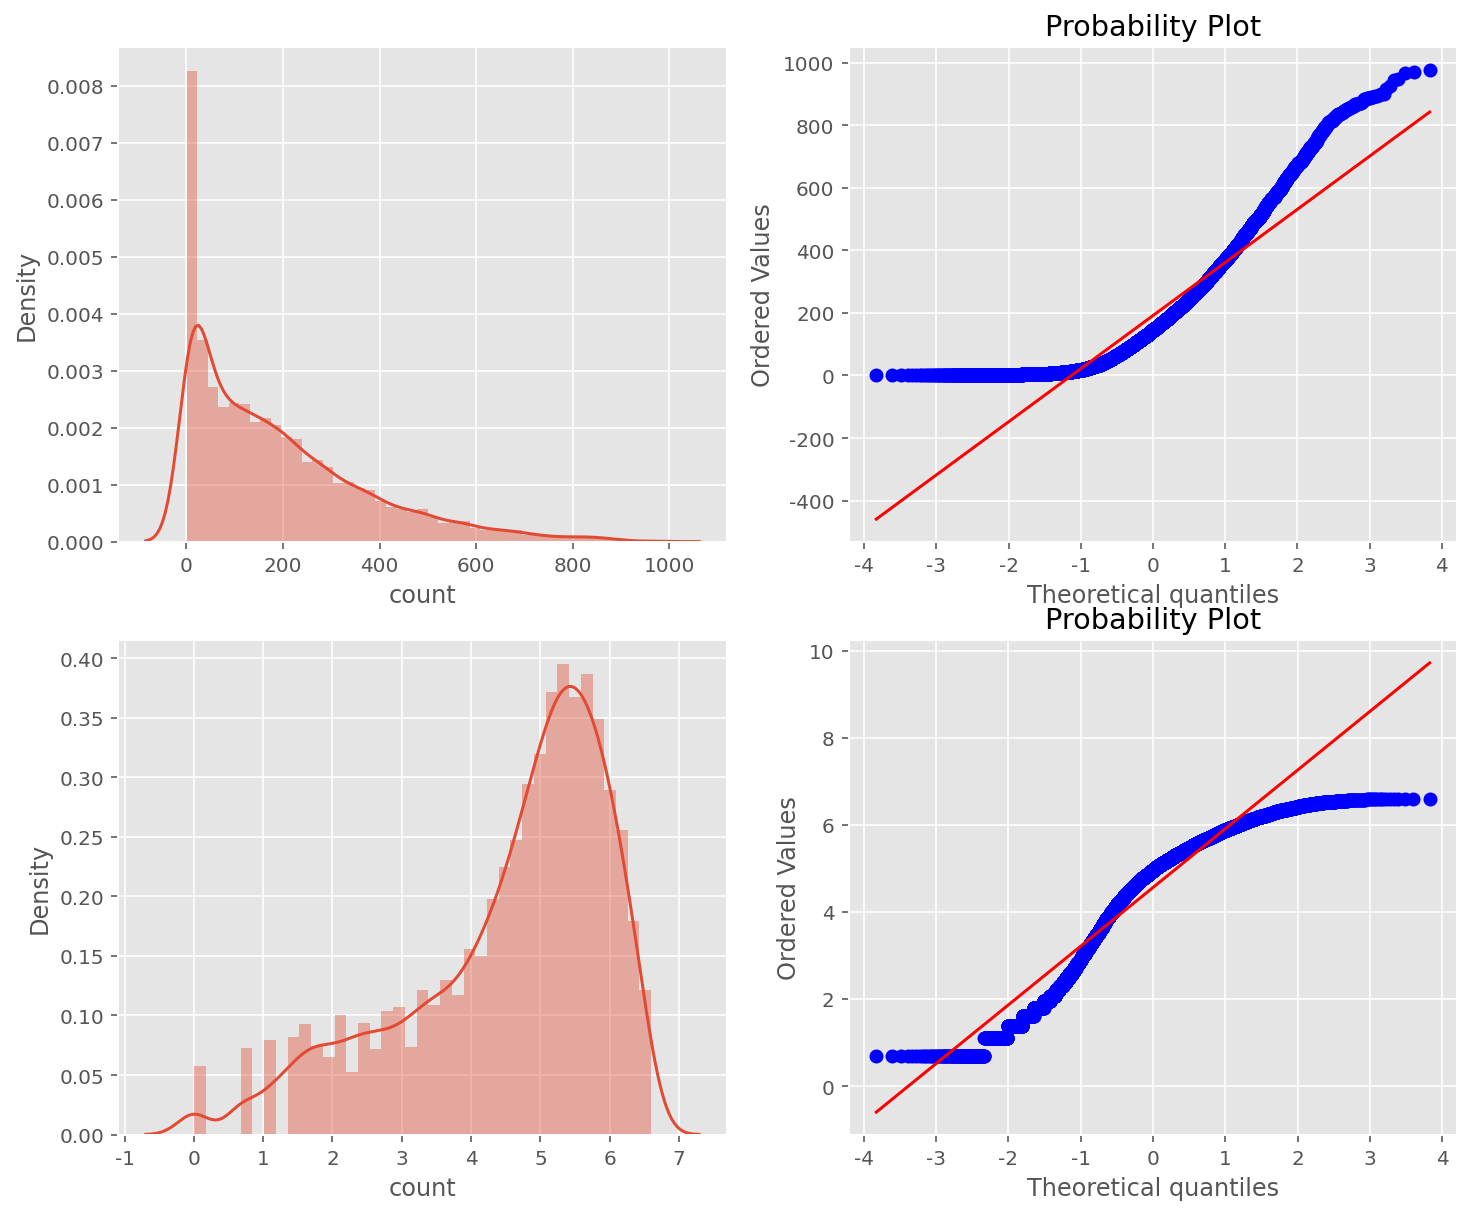

In [24]:
# count 값의 데이터 분포도 파악하기

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_Without_Outliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(train_Without_Outliers['count']), dist='norm', fit=True, plot=axes[1][1])
plt.show()

# Feature Engineering

In [29]:
test = pd.read_csv('/content/test.csv',  parse_dates=["datetime"])

In [42]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

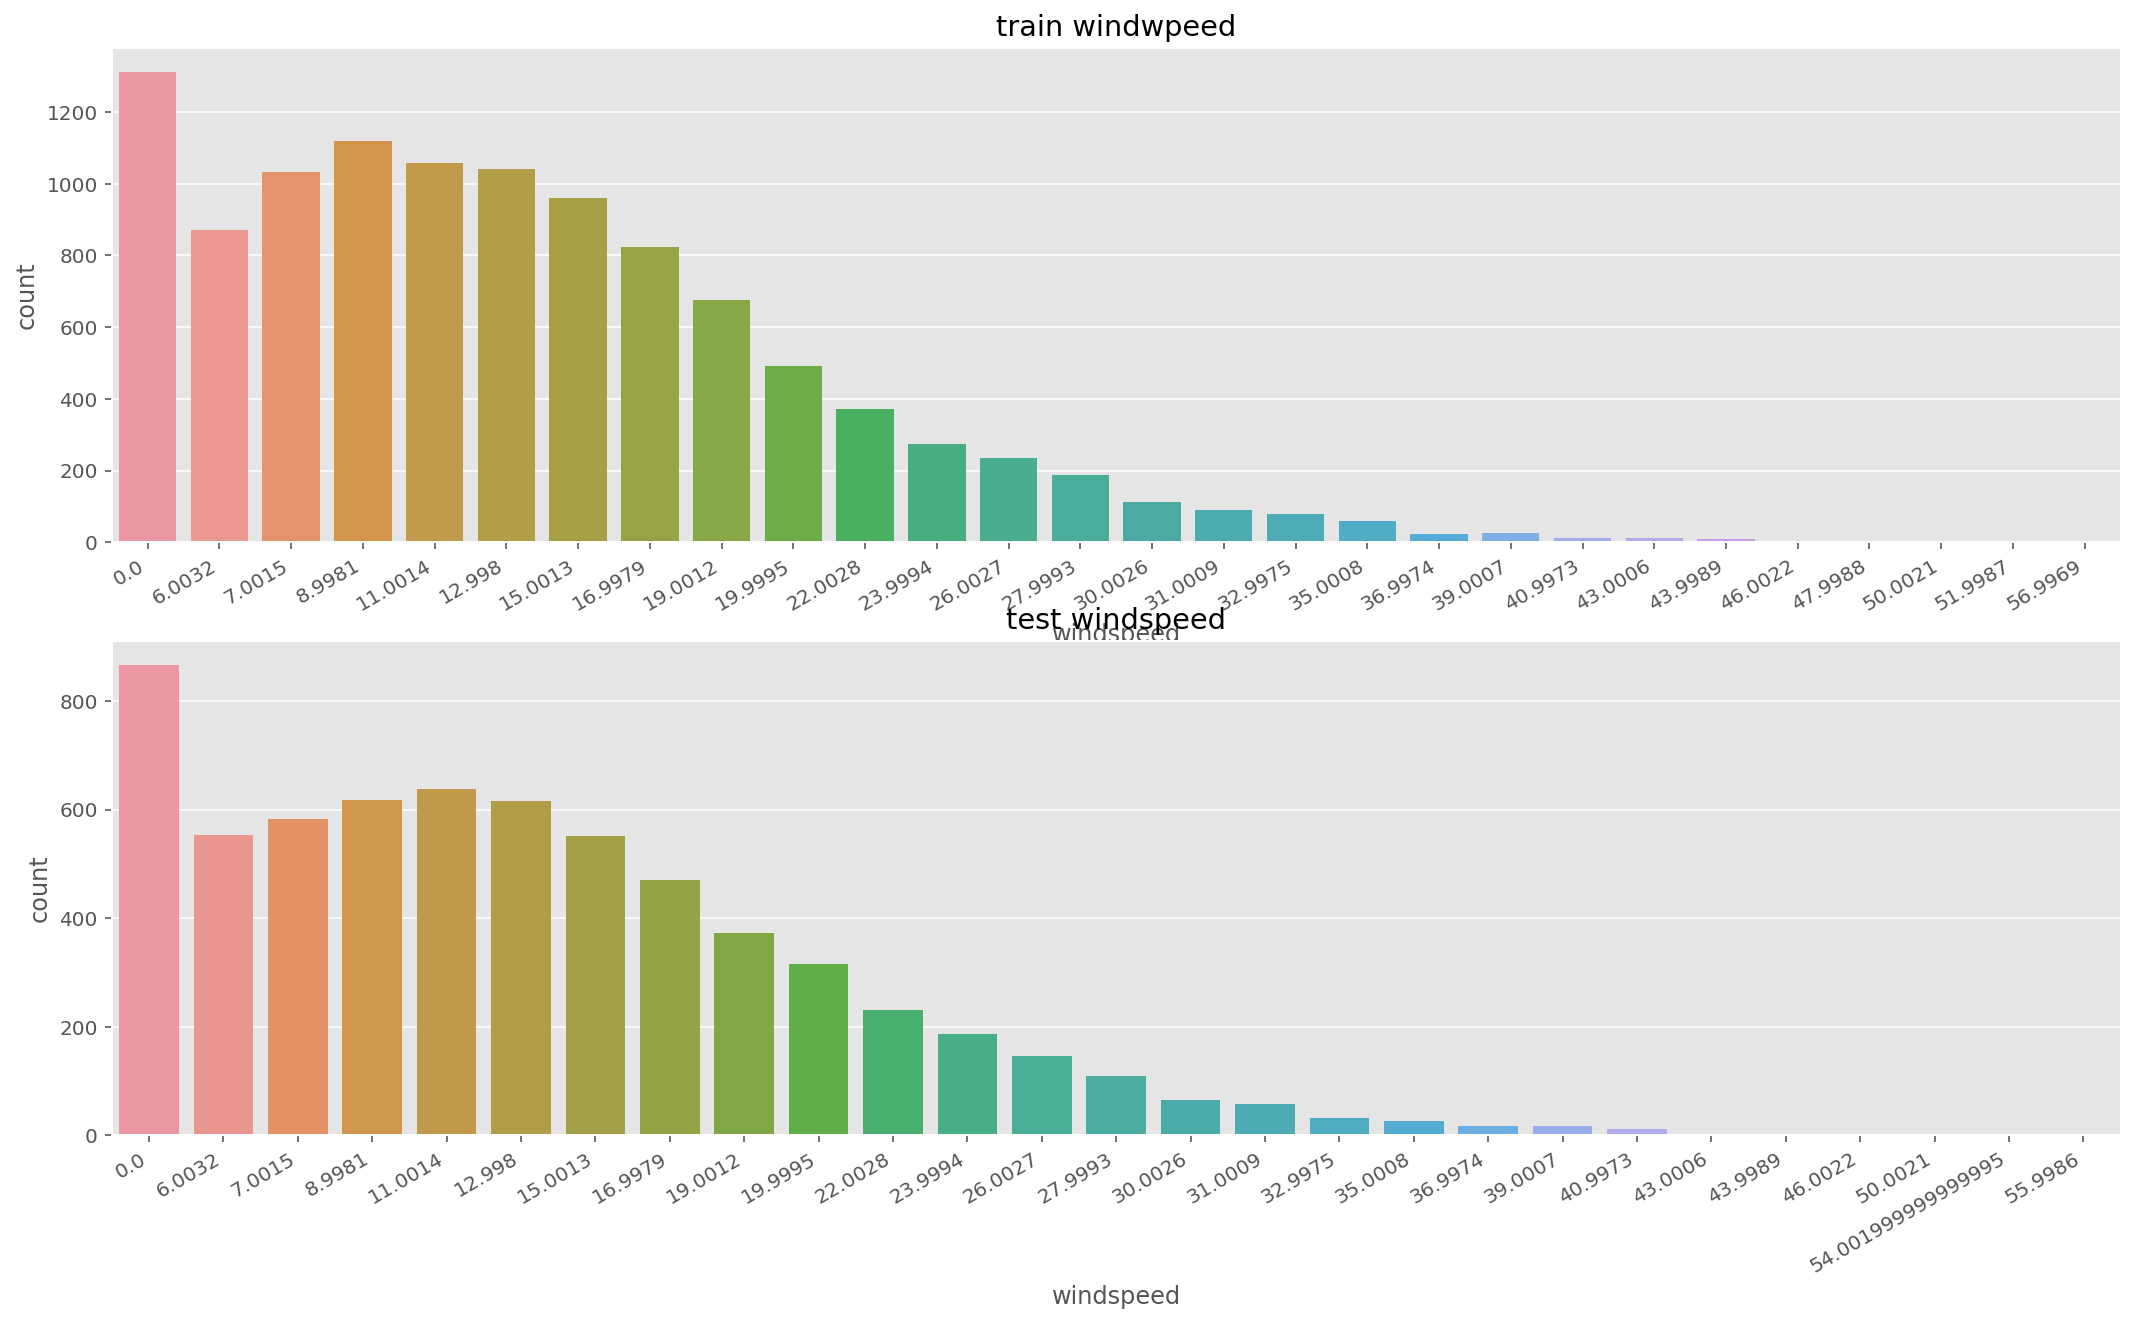

In [33]:
# windspeed 풍속에 0값이 가장 많음 -> 잘못 기록된 데이터를 고쳐줄 필요가 있다.
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18, 10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='train windwpeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])

In [35]:
# 풍속이 0인 것과 아닌 것의 세트를 나누어 준다.

trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]

print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


In [39]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
  # 풍속이 0인것과 아닌 것을 나누어 준다.
  dataWind0 = data.loc[data['windspeed'] == 0]
  dataWindNot0 = data.loc[data['windspeed'] != 0]

  # 풍속을 예측할 feature를 선택한다.
  wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

  # 풍속이 0이 아닌 데이터들의 타입을 str로 바꾼다.
  dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')

  # 랜덤포레스트 분류기를 사용한다.
  rfModel_wind = RandomForestClassifier()

  # wCol에 있는 feature 값을 바탕으로 풍속을 학습시킨다.
  rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])

  # 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
  wind0Values= rfModel_wind.predict(X = dataWind0[wCol])

  # 값을 다 예측 후 비교해 보기 위해
  # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
  predictWind0 = dataWind0
  predictWindNot0 = dataWindNot0

  # 값이 0으로 기록된 풍속에 대해 예측값을 넣어준다.
  predictWind0['windspeed'] = wind0Values

  # dataWindNot0 0이 아닌 풍속이 있는 데이터 프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
  data = predictWindNot0.append(predictWind0)

  # 풍속의 데이터타입을 float으로 지정해준다.
  data['windspeed'] = data['windspeed'].astype('float')

  data.reset_index(inplace=True)
  data.drop('index', inplace=True, axis=1)

  return data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


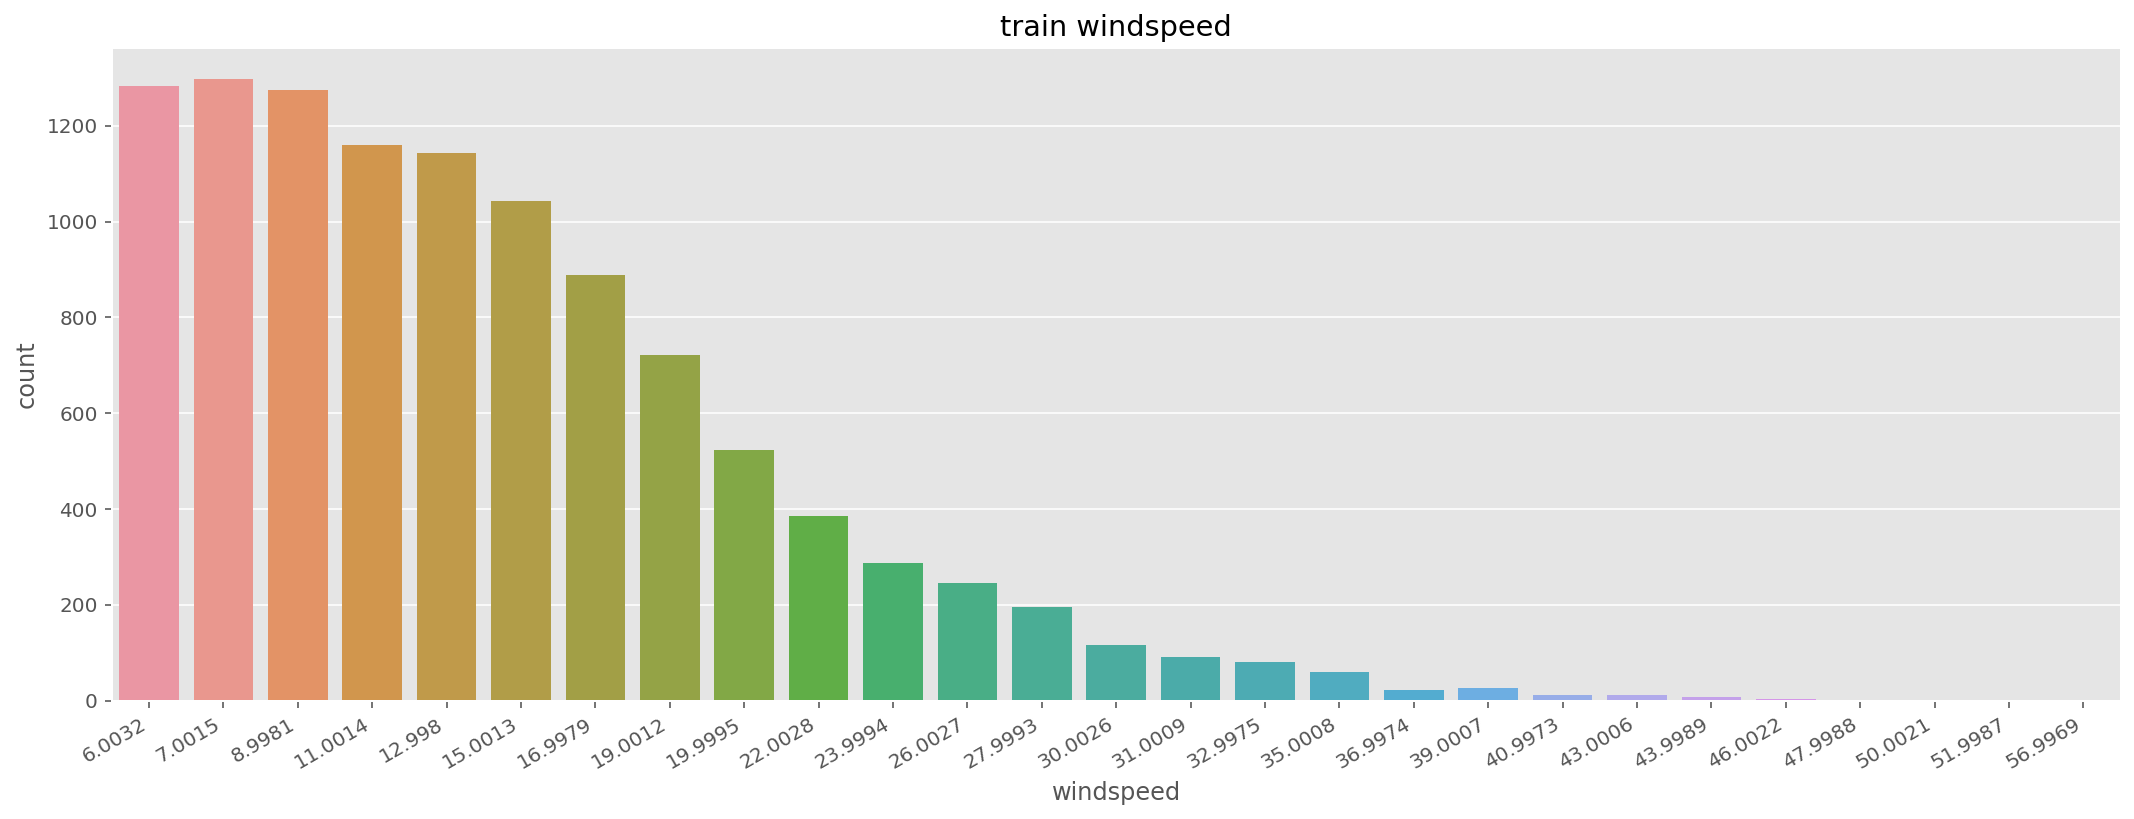

In [40]:
# 0 값을 조정한다.
train = predict_windspeed(train)

# windspeed의 0 값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=ax1)

# Feature Selection
- 신호와 소음을 구분
- feature가 많다고 무조건 좋은 성능을 내지 않음
- feature를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 feature는 제거하도록 함

In [43]:
# 연속형 feature와 범주형 feature
# 연속형 feature = ['temp', 'humidity', 'windspeed', 'atemp']
# 범주형 feature의 type를 category로 변경해준다.

categorical_feature_names = ['season', 'holiday', 'workingday', 'weather', 'dayofweek','month', 'year', 'hour']

for var in categorical_feature_names:
  train[var] = train[var].astype('category')
  test[var] = test[var].astype('category')

In [44]:
feature_name = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year',
                'hour', 'dayofweek', 'holiday', 'workingday']

feature_name

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [45]:
X_train = train[feature_name]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [47]:
X_test = test[feature_name]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [48]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

#Score

##RMSLE

과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

 
 
$ \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log( p_i + 1) - \log(a_i + 1))^2} } $
$ = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{ (\log \frac {p_i + 1} {a_i + 1} )^2} } $
 

 
n  is the number of hours in the test set

p_i  is your predicted count

a_i  is the actual count

log(x) is the natural logarithm

좀 더 자세한 설명은 : [RMSLE cost function](https://www.slideshare.net/KhorSoonHin/rmsle-cost-function)


잔차(residual)에 대한 평균에 로그를 씌운 값이다. 
=> 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해 정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.

값이 작을 수록 오류가 적다는 의미를 나타낸다.

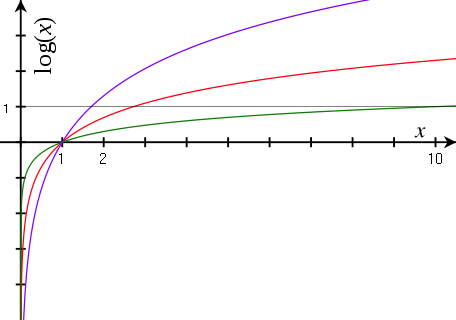

image.png이미지 출처 : 위키피디아 https://ko.wikipedia.org/wiki/로그

In [49]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

##Cross Validation 교차 검증

* 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습한다.
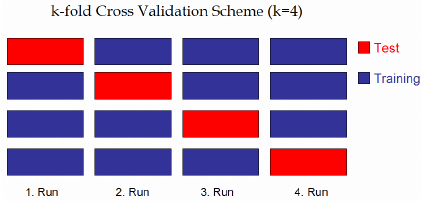

이미지 출처 : https://www.researchgate.net/figure/228403467_fig2_Figure-4-k-fold-cross-validation-scheme-example


* KFold 교차검증
  * 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정한다.
  * 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련세트로 사용하여 학습한다.
  * 나머지 훈련세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가한다.
  * 다음은 두 번째 폴드가 테스트 세트가 되고 나머지 폴드의 훈련세트를 두 번째 폴드로 정확도를 측정한다.
  * 이 과정을 마지막 폴드까지 반복한다.
  * 이렇게 훈련세트와 테스트세트로 나누는 N개의 분할마다 정확도를 측정하여 평균 값을 낸게 정확도가 된다.

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


# RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs= -1,
                              random_state=0)

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [54]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터임
print("Score= {0:.5f}".format(score))

CPU times: user 3.99 s, sys: 778 ms, total: 4.77 s
Wall time: 32.3 s
Score= 0.33183


# Train

In [55]:
# 학습 - feature와 label를 넣어주면 알아서 학습

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [56]:
# 예측

predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.57,   5.15,   4.26,   3.38,   3.1 ,   6.4 ,  37.88, 104.59,
       235.61, 135.37])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


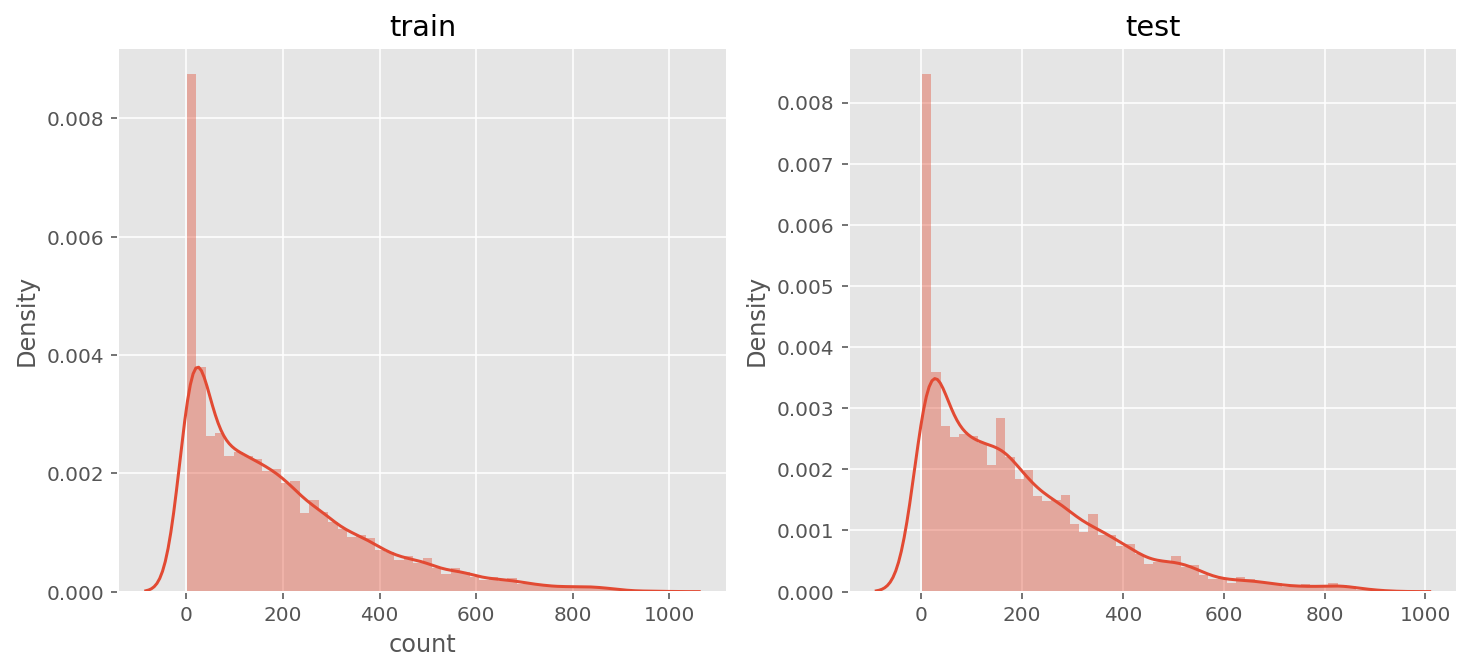

In [62]:
# 예측한 데이터를 시각화해보기

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title='train')

sns.distplot(predictions, ax=ax2, bins=50)
ax2.set(title='test')

plt.show()

#Submit

In [65]:
submission = pd.read_csv('/content/sampleSubmission.csv')
submission

submission['count'] = predictions

print(submission.shape)
submission.head()


(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.57
1,2011-01-20 01:00:00,5.15
2,2011-01-20 02:00:00,4.26
3,2011-01-20 03:00:00,3.38
4,2011-01-20 04:00:00,3.10
